<a href="https://colab.research.google.com/github/wkd-woo/finance-data-analysis-main/blob/main/3_2_FinanceDataReader%EB%A5%BC_%ED%86%B5%ED%95%9C_%EC%97%AC%EB%9F%AC_%EC%A2%85%EB%AA%A9_%EC%88%98%EC%9D%B5%EB%A5%A0_%EB%B9%84%EA%B5%90_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/3.2%20FinanceDataReader%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%20%EC%88%98%EC%9D%B5%EB%A5%A0%20%EB%B9%84%EA%B5%90-input.ipynb)


* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [2]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
!pip install -U finance-datareader

In [3]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

In [4]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'
}
stock_dict

{'LG화학': '051910',
 'NAVER': '035420',
 'POSCO': '005490',
 'SK하이닉스': '000660',
 '삼성물산': '028260',
 '삼성전자': '005930',
 '셀트리온': '068270',
 '현대차': '005380'}

In [5]:
# stock_dict 변수의 타입을 봅니다.
type(stock_dict)

dict

In [6]:
# dict 는 key:value 구조 입니다. key만 봅니다.
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [7]:
# dict 는 key:value 구조 입니다. value만 봅니다.
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [37]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
  close = fdr.DataReader(item_code, "2021", "2022")['Close']
  item_list.append(close)

In [36]:
fdr.DataReader??

In [38]:
len(item_list)

8

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [39]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
df = pd.concat(item_list, axis=1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2021-01-04,83000,126000,207500,341065,889000,273000,144000,293000
2021-01-05,83900,130500,209500,347935,893000,285000,144500,292500
2021-01-06,82200,131000,203000,346954,890000,280000,139500,290000
2021-01-07,82900,134500,206000,350880,962000,291000,145000,289500
2021-01-08,88800,138000,246000,360204,999000,294500,151000,312000
...,...,...,...,...,...,...,...,...
2021-12-24,80500,128000,215500,197278,621000,284000,117000,384000
2021-12-27,80200,126000,213500,200222,627000,281500,117000,380500
2021-12-28,80300,127500,214000,212000,632000,283500,118000,384500


### 시각화를 위한 폰트 설정

In [11]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [12]:
get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


'NanumBarunGothic'

In [16]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


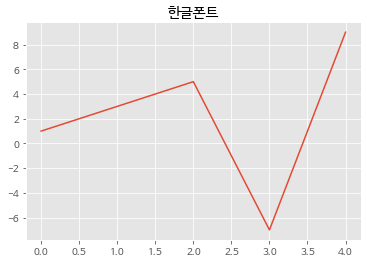

In [18]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 여러 종목 한번에 시각화 하기

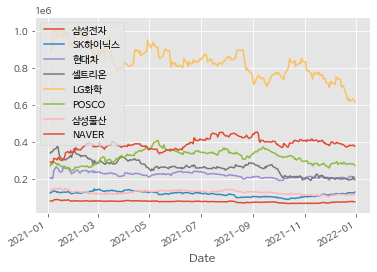

In [40]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot()

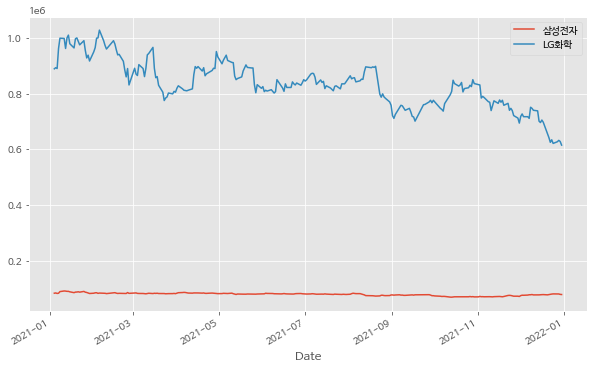

In [41]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[["삼성전자", "LG화학"]].plot(figsize=(10,6))

## 2축 그래프 사용하기

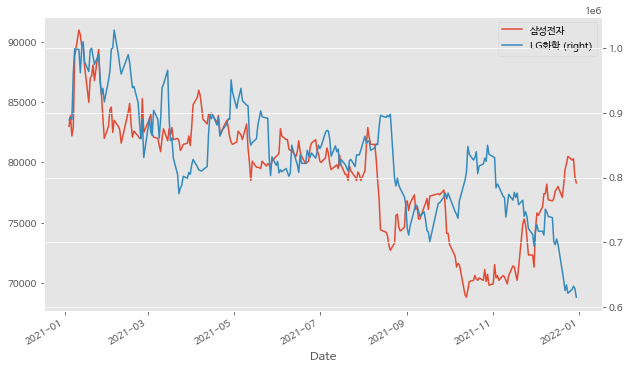

In [42]:
# secondary_y를 사용해 2축 그래프 그리기
df[["삼성전자", "LG화학"]].plot(secondary_y="LG화학", figsize=(10,6))

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [45]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[['LG화학', '삼성전자']]
df_plot = df2 / df2.iloc[0] - 1

In [50]:
df_plot

,LG화학,삼성전자
Date,,
2021-01-04,0.000000,0.000000
2021-01-05,0.004499,0.010843
2021-01-06,0.001125,-0.009639
2021-01-07,0.082115,-0.001205
2021-01-08,0.123735,0.069880
...,...,...
2021-12-24,-0.301462,-0.030120
2021-12-27,-0.294713,-0.033735
2021-12-28,-0.289089,-0.032530


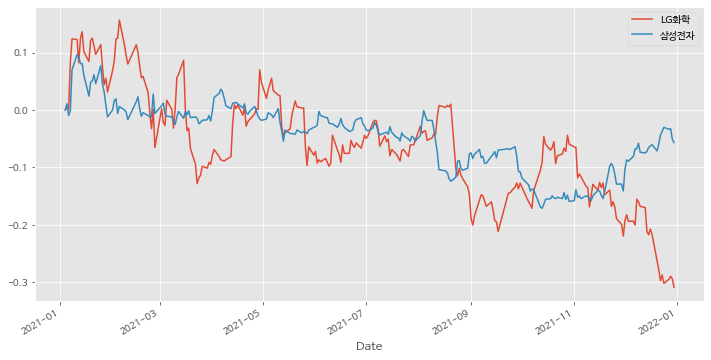

In [48]:
# 수익률 시각화 하기
df_plot.plot(figsize=(15,6))

## pyplot의 subplots 로 서브플롯 그리기

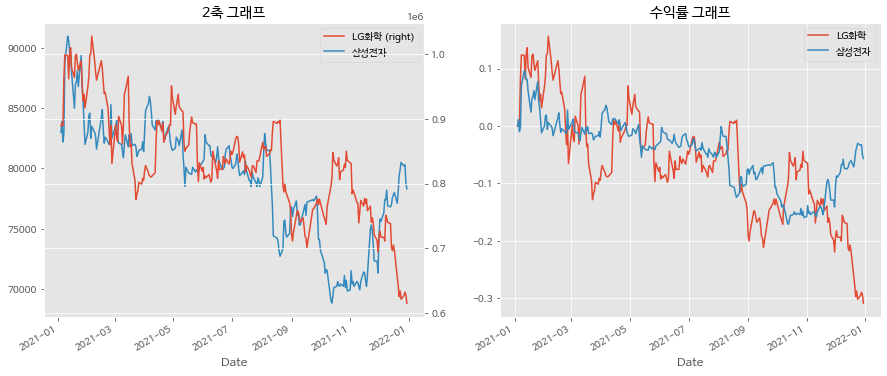

In [59]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.
fig, axes = plt.subplots(1, 2, figsize=(15,6))

df[['LG화학', '삼성전자']].plot(secondary_y="LG화학", ax=axes[0], title="2축 그래프")
df_plot.plot(ax=axes[1], title="수익률 그래프")

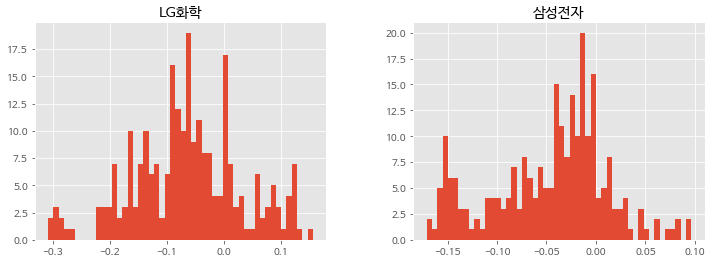

In [63]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
h = df_plot.hist(figsize=(12,4), bins=50)

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [65]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = df / df.iloc[0] - 1
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2021-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,0.010843,0.035714,0.009639,0.020143,0.004499,0.043956,0.003472,-0.001706
2021-01-06,-0.009639,0.039683,-0.021687,0.017267,0.001125,0.025641,-0.031250,-0.010239
2021-01-07,-0.001205,0.067460,-0.007229,0.028778,0.082115,0.065934,0.006944,-0.011945
2021-01-08,0.069880,0.095238,0.185542,0.056115,0.123735,0.078755,0.048611,0.064846
...,...,...,...,...,...,...,...,...
2021-12-24,-0.030120,0.015873,0.038554,-0.421582,-0.301462,0.040293,-0.187500,0.310580
2021-12-27,-0.033735,0.000000,0.028916,-0.412951,-0.294713,0.031136,-0.187500,0.298635
2021-12-28,-0.032530,0.011905,0.031325,-0.378418,-0.289089,0.038462,-0.180556,0.312287


### 전체 종목의 수익률 시각화

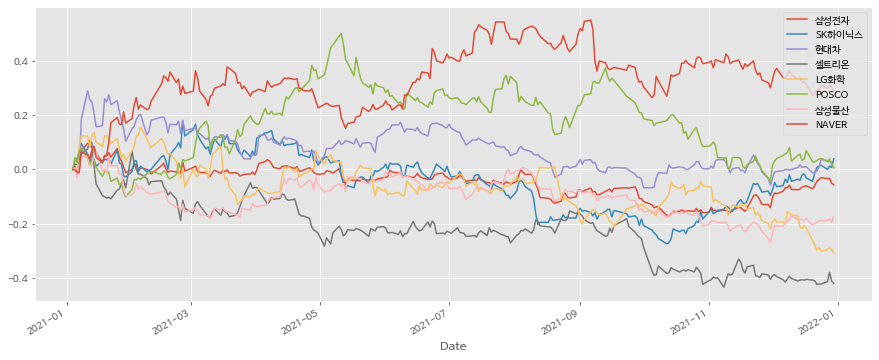

In [67]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(15,6))

In [68]:
# 계산된 수익률에 대한 기술통계값 구하기
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,-0.046318,-0.037737,0.076535,-0.221896,-0.064067,0.167472,-0.101324,0.329063
std,0.058149,0.102756,0.072992,0.121601,0.095075,0.130480,0.069813,0.115432
min,-0.171084,-0.273810,-0.067470,-0.433093,-0.308211,-0.100733,-0.267361,-0.011945
25%,-0.081325,-0.128968,0.009639,-0.297124,-0.127390,0.041667,-0.160590,0.270904
50%,-0.034940,-0.023810,0.077108,-0.223022,-0.065242,0.179487,-0.090278,0.331911
75%,-0.009337,0.035714,0.128916,-0.151440,0.001125,0.266026,-0.048611,0.399317
max,0.096386,0.178571,0.289157,0.105036,0.156355,0.500000,0.065972,0.549488


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f264fe29810>,
      dtype=object)

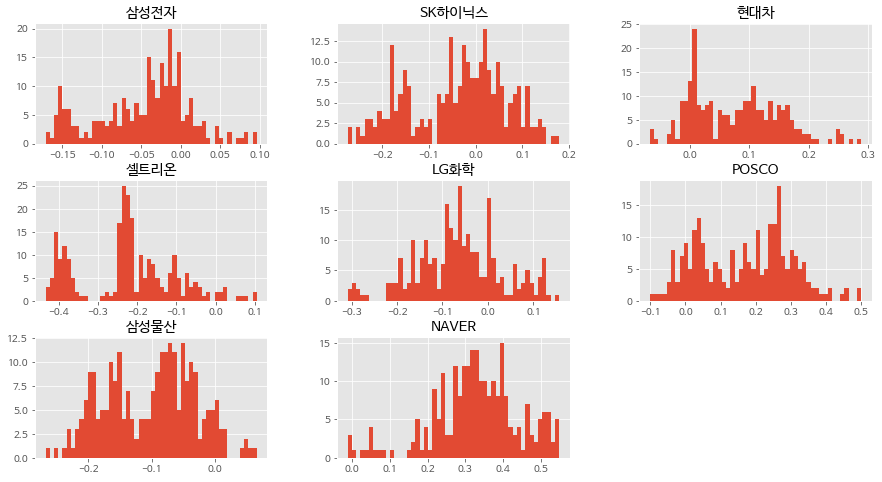

In [71]:
# 수익률에 대한 히스토그램 그리기
df_norm.hist(figsize=(15,8), bins=50)

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

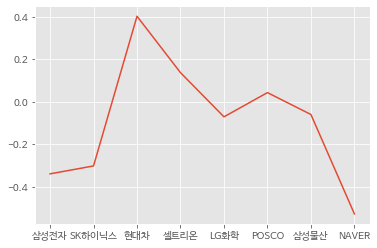

In [73]:
# skew 로 수익률의 왜도를 구합니다.
df_norm.skew().plot()

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)

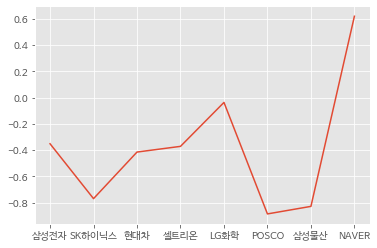

In [75]:
# kurt 로 첨도를 구합니다.
df_norm.kurt().plot()